In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download (['stopwords',
                'punkt',
                'wordnet',
                'omw-1.4',
                'vader_lexicon',
                ])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('twitter.csv')

In [ ]:
df.shape

(24003, 4)

In [ ]:
df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [ ]:
pd.set_option('display.max_colwidth', None)

df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"
...,...,...,...,...
23998,4513,Google,Neutral,"A truly incredible game. Gaming is the ""show off"" tech for what your servers can do. As marketing, one way people look at those MS/Google/Amazon offerings qualifies as marketing for enterprise as much as anything consumer."
23999,4514,Google,Neutral,“Android Becomes Basically Unusable If You Turn Off All of Google’s Tracking” by Eric Ravenscraft link.medium.com/DztxZtX2c3
24000,4514,Google,Neutral,"""Android basically becomes useless if you turn off all of Google's tracking"" by Eric Ravenscraft link.medium.com / DztxZtX2c3"
24001,4514,Google,Neutral,"""Android Becomes the Unusable If You Turn Off All of Google's Tracking"" by Eric Ravenscraft link.medium.com / DztxZtX2c3"


In [ ]:
game_counts = df['Borderlands'].value_counts()

# Display the counts
print(game_counts)

CallOfDutyBlackopsColdWar    2376
Dota2                        2364
WorldOfCraft                 2364
NBA2K                        2352
Overwatch                    2334
Xbox(Xseries)                2334
Amazon                       2316
PlayStation5(PS5)            2310
CS-GO                        2304
Borderlands                  2285
Google                        664
Name: Borderlands, dtype: int64


In [ ]:
game_counts = df['Positive'].value_counts()

# Display the counts
print(game_counts)

Positive      7277
Neutral       6166
Negative      6156
Irrelevant    4404
Name: Positive, dtype: int64


In [ ]:
df.describe(include='all')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,24003.000000,24003,24003,23783
unique,NaN,11,4,22356
top,NaN,CallOfDutyBlackopsColdWar,Positive,"At the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access to health care, while most of them do not have access to health care."
freq,NaN,2376,7277,48
mean,6472.326251,NaN,NaN,NaN
std,4402.339466,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,2629.000000,NaN,NaN,NaN
50%,4461.000000,NaN,NaN,NaN
75%,9777.000000,NaN,NaN,NaN


In [ ]:
df.columns = ['EntryID', 'GameName', 'Sentiment', 'Text']
df

,EntryID,GameName,Sentiment,Text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,"
...,...,...,...,...
23998,4513,Google,Neutral,"A truly incredible game. Gaming is the ""show off"" tech for what your servers can do. As marketing, one way people look at those MS/Google/Amazon offerings qualifies as marketing for enterprise as much as anything consumer."
23999,4514,Google,Neutral,“Android Becomes Basically Unusable If You Turn Off All of Google’s Tracking” by Eric Ravenscraft link.medium.com/DztxZtX2c3
24000,4514,Google,Neutral,"""Android basically becomes useless if you turn off all of Google's tracking"" by Eric Ravenscraft link.medium.com / DztxZtX2c3"
24001,4514,Google,Neutral,"""Android Becomes the Unusable If You Turn Off All of Google's Tracking"" by Eric Ravenscraft link.medium.com / DztxZtX2c3"


In [ ]:
# List of non-game names to be removed
non_game_names = [
    'Microsoft', 'Verizon', 'Facebook', 'johnson & johnson', 'Amazon',
    'Home Depot', 'Xbox (X series)', 'PlayStation 5 (PS5)', 'Nvidia', 'Google'
]

# Filter the DataFrame to exclude rows with these non-game names
df = df[~df['GameName'].isin(non_game_names)]

# Now df contains only rows with actual game names

In [ ]:
# Count of unique games per GameName
game_counts2 = df['GameName'].value_counts()

# Display the counts
print(game_counts2)

CallOfDutyBlackopsColdWar    2376
Dota2                        2364
WorldOfCraft                 2364
NBA2K                        2352
Overwatch                    2334
Xbox(Xseries)                2334
PlayStation5(PS5)            2310
CS-GO                        2304
Borderlands                  2285
Name: GameName, dtype: int64


In [ ]:
df.shape

(21023, 4)

In [ ]:
#df = df.drop_duplicates(subset='EntryID')


In [ ]:
missing_values = df.isna().sum()
missing_values

EntryID        0
GameName       0
Sentiment      0
Text         168
dtype: int64

In [ ]:
df = df.dropna()

# Check for missing values again to confirm
missing_values = df.isna().sum()
print("Missing values after removal:\n", missing_values)

Missing values after removal:
 EntryID      0
GameName     0
Sentiment    0
Text         0
dtype: int64


In [ ]:
# Filter out 'irrelevant' rows from the same DataFrame
df = df[~df['Sentiment'].isin(['Irrelevant'])]

In [ ]:
df.shape

(16817, 4)

In [ ]:
print("\n All Data Labels")
print(df.groupby("Sentiment").count())


 All Data Labels
           EntryID  GameName  Text
Sentiment                         
Negative      5365      5365  5365
Neutral       4633      4633  4633
Positive      6819      6819  6819


In [ ]:
# Define preprocessing functions
def tokenize(text):
    return word_tokenize(text)

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

def remove_non_alphabetic(tokens):
    return [word for word in tokens if word.isalpha()]

def stem_words(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]
def preprocess_text(text):
    tokens = tokenize(text)
    tokens = remove_stop_words(tokens)
    tokens = remove_non_alphabetic(tokens)
    tokens = stem_words(tokens)
    return tokens

# Apply preprocessing to the 'Text' column
df['Processed_Text'] = df['Text'].apply(preprocess_text)

In [ ]:
df

,EntryID,GameName,Sentiment,Text,Processed_Text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[i, come, border, i, kill]"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]"
...,...,...,...,...,...
23334,4400,CS-GO,Negative,"God, why am I sitting here for the last 2 hours watching our Inter College Csgo tournament if I don't understand shit","[god, i, sit, last, hour, watch, inter, colleg, csgo, tournament, i, understand, shit]"
23335,4400,CS-GO,Negative,"God, why have I been sitting here for the last 2 hours watching our inter-university CSgo tournament when I don't understand the shit","[god, i, sit, last, hour, watch, csgo, tournament, i, understand, shit]"
23336,4400,CS-GO,Negative,God why am I sitting here my last 2 hours watching our inter college Csgo tournament man I don't understand shit 🥵,"[god, i, sit, last, hour, watch, inter, colleg, csgo, tournament, man, i, understand, shit]"
23337,4400,CS-GO,Negative,God why am I sitting here for last twenty 2 hours watching our brothers inter in college Csgo tournament when I really don't understand for shit [UNK],"[god, i, sit, last, twenti, hour, watch, brother, inter, colleg, csgo, tournament, i, realli, understand, shit, unk]"


In [ ]:
from collections import Counter
import itertools

# Assuming 'Processed_Text' is a list of words for each row
all_words = list(itertools.chain(*df['Processed_Text']))
word_counts = Counter(all_words)

# Filter out words that appear only once
repeating_words = {word: count for word, count in word_counts.items() if count > 1}

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()

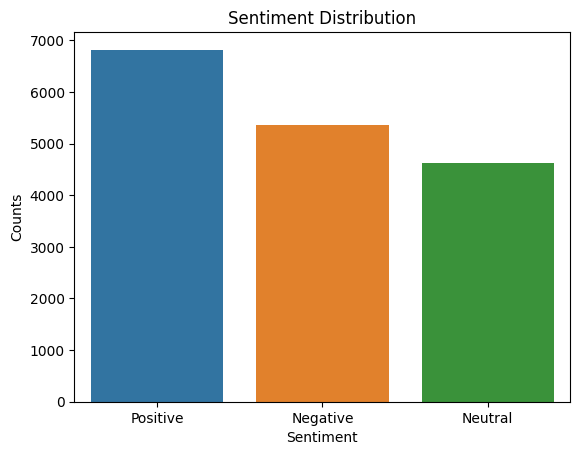

In [ ]:
# Assuming 'sentiment_counts' is your Series with sentiment counts
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.ylabel('Counts')
plt.xlabel('Sentiment')
plt.show()

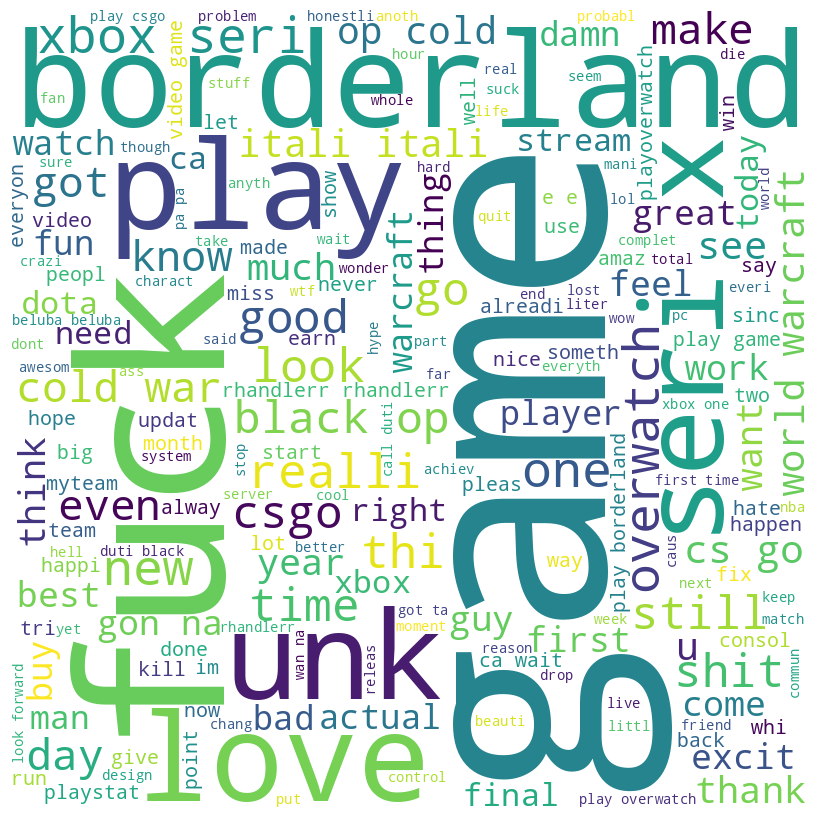

In [ ]:
# Assuming 'all_words' is a list of all words in your processed text
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(' '.join(all_words))

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
df

,EntryID,GameName,Sentiment,Text,Processed_Text
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[i, come, border, i, kill]"
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]"
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]"
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]"
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]"
...,...,...,...,...,...
23334,4400,CS-GO,Negative,"God, why am I sitting here for the last 2 hours watching our Inter College Csgo tournament if I don't understand shit","[god, i, sit, last, hour, watch, inter, colleg, csgo, tournament, i, understand, shit]"
23335,4400,CS-GO,Negative,"God, why have I been sitting here for the last 2 hours watching our inter-university CSgo tournament when I don't understand the shit","[god, i, sit, last, hour, watch, csgo, tournament, i, understand, shit]"
23336,4400,CS-GO,Negative,God why am I sitting here my last 2 hours watching our inter college Csgo tournament man I don't understand shit 🥵,"[god, i, sit, last, hour, watch, inter, colleg, csgo, tournament, man, i, understand, shit]"
23337,4400,CS-GO,Negative,God why am I sitting here for last twenty 2 hours watching our brothers inter in college Csgo tournament when I really don't understand for shit [UNK],"[god, i, sit, last, twenti, hour, watch, brother, inter, colleg, csgo, tournament, i, realli, understand, shit, unk]"


In [ ]:
from collections import defaultdict, Counter

# Initialize dictionaries to store word counts for each sentiment
positive_words = defaultdict(int)
negative_words = defaultdict(int)
neutral_words = defaultdict(int)

# Iterate over the DataFrame and update the counts
for _, row in df.iterrows():
    sentiment = row['Sentiment']
    for word in row['Processed_Text']:
        if sentiment == 'Positive':
            positive_words[word] += 1
        elif sentiment == 'Negative':
            negative_words[word] += 1
        elif sentiment == 'Neutral':
            neutral_words[word] += 1

# Now, find the most common words for each sentiment
most_common_positive = Counter(positive_words).most_common(30)
most_common_negative = Counter(negative_words).most_common(30)
most_common_neutral = Counter(neutral_words).most_common(30)

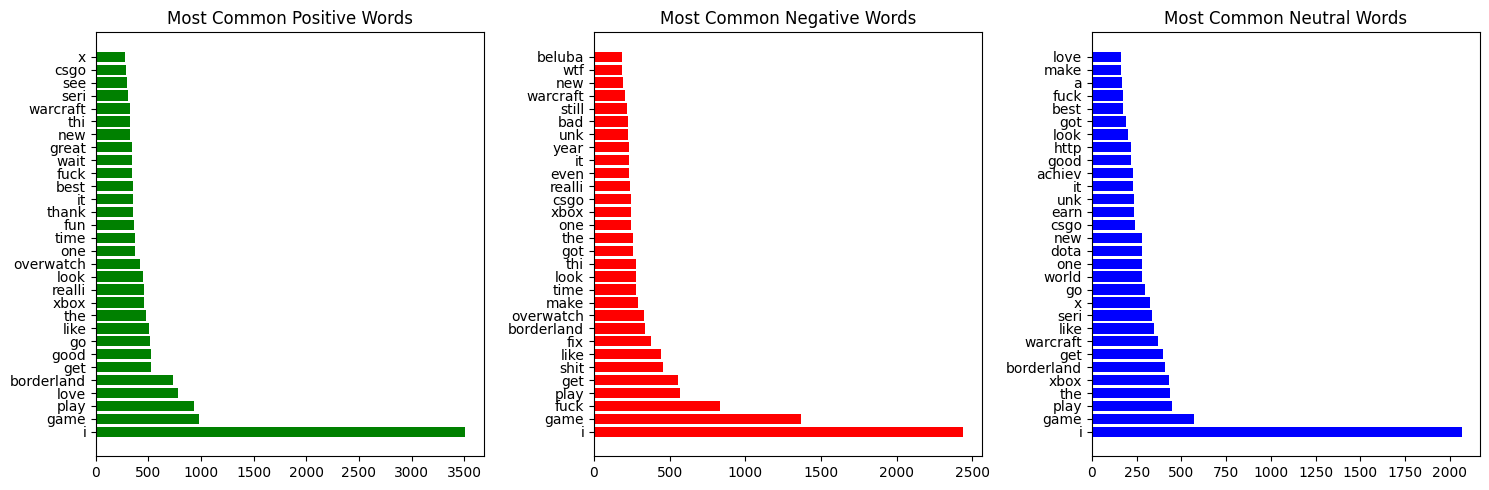

In [ ]:
import matplotlib.pyplot as plt

# Function to plot a horizontal bar chart for sentiment words
def plot_most_common_words(most_common, title, ax, color):
    words, counts = zip(*most_common)
    ax.barh(words, counts, color=color)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting each sentiment
plot_most_common_words(most_common_positive, 'Most Common Positive Words', axes[0], 'green')
plot_most_common_words(most_common_negative, 'Most Common Negative Words', axes[1], 'red')
plot_most_common_words(most_common_neutral, 'Most Common Neutral Words', axes[2], 'blue')

plt.tight_layout()
plt.show()

In [ ]:
# Printing the two most common words for each sentiment
print("Two Most Common Positive Words:", most_common_positive[:2])
print("Two Most Common Negative Words:", most_common_negative[:2])
print("Two Most Common Neutral Words:", most_common_neutral[:2])

Two Most Common Positive Words: [('i', 3512), ('game', 977)]
Two Most Common Negative Words: [('i', 2441), ('game', 1368)]
Two Most Common Neutral Words: [('i', 2065), ('game', 570)]


In [ ]:
df.shape

(16817, 5)

In [ ]:
# Initialize the label encoder
game_name_encoder = LabelEncoder()

# Fit and transform the GameName column
df['GameName_Encoded'] = game_name_encoder.fit_transform(df['GameName'])
# Get the mapping of game names to encoded numbers
game_name_mapping = dict(zip(game_name_encoder.classes_, game_name_encoder.transform(game_name_encoder.classes_)))

print("Game Name to Number Mapping:")
print(game_name_mapping)

Game Name to Number Mapping:
{'Borderlands': 0, 'CS-GO': 1, 'CallOfDutyBlackopsColdWar': 2, 'Dota2': 3, 'NBA2K': 4, 'Overwatch': 5, 'PlayStation5(PS5)': 6, 'WorldOfCraft': 7, 'Xbox(Xseries)': 8}


In [ ]:
# Initialize another label encoder for Sentiment
sentiment_encoder = LabelEncoder()

# Fit and transform the Sentiment column
df['Sentiment_Encoded'] = sentiment_encoder.fit_transform(df['Sentiment'])

# Get the mapping of sentiment labels to encoded numbers
label_mapping = dict(zip(sentiment_encoder.classes_, sentiment_encoder.transform(sentiment_encoder.classes_)))

print("Sentiment to Number Mapping:")
print(label_mapping)

Sentiment to Number Mapping:
{'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the list of words in Processed_Text into a single string per row
df['Processed_Text_Joined'] = df['Processed_Text'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the Processed_Text_Joined column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Text_Joined'])

In [ ]:
df

,EntryID,GameName,Sentiment,Text,Processed_Text,GameName_Encoded,Sentiment_Encoded,Processed_Text_Joined
0,2401,Borderlands,Positive,"I am coming to the borders and I will kill you all,","[i, come, border, i, kill]",0,2,i come border i kill
1,2401,Borderlands,Positive,"im getting on borderlands and i will kill you all,","[im, get, borderland, kill]",0,2,im get borderland kill
2,2401,Borderlands,Positive,"im coming on borderlands and i will murder you all,","[im, come, borderland, murder]",0,2,im come borderland murder
3,2401,Borderlands,Positive,"im getting on borderlands 2 and i will murder you me all,","[im, get, borderland, murder]",0,2,im get borderland murder
4,2401,Borderlands,Positive,"im getting into borderlands and i can murder you all,","[im, get, borderland, murder]",0,2,im get borderland murder
...,...,...,...,...,...,...,...,...
23334,4400,CS-GO,Negative,"God, why am I sitting here for the last 2 hours watching our Inter College Csgo tournament if I don't understand shit","[god, i, sit, last, hour, watch, inter, colleg, csgo, tournament, i, understand, shit]",1,0,god i sit last hour watch inter colleg csgo tournament i understand shit
23335,4400,CS-GO,Negative,"God, why have I been sitting here for the last 2 hours watching our inter-university CSgo tournament when I don't understand the shit","[god, i, sit, last, hour, watch, csgo, tournament, i, understand, shit]",1,0,god i sit last hour watch csgo tournament i understand shit
23336,4400,CS-GO,Negative,God why am I sitting here my last 2 hours watching our inter college Csgo tournament man I don't understand shit 🥵,"[god, i, sit, last, hour, watch, inter, colleg, csgo, tournament, man, i, understand, shit]",1,0,god i sit last hour watch inter colleg csgo tournament man i understand shit
23337,4400,CS-GO,Negative,God why am I sitting here for last twenty 2 hours watching our brothers inter in college Csgo tournament when I really don't understand for shit [UNK],"[god, i, sit, last, twenti, hour, watch, brother, inter, colleg, csgo, tournament, i, realli, understand, shit, unk]",1,0,god i sit last twenti hour watch brother inter colleg csgo tournament i realli understand shit unk


In [ ]:
df = df.drop(columns=['EntryID', 'GameName', 'Sentiment', 'Text', 'Processed_Text', 'Processed_Text_Joined'])

In [ ]:
df.head()

,GameName_Encoded,Sentiment_Encoded
0,0,2
1,0,2
2,0,2
3,0,2
4,0,2


In [ ]:
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle


# Combine the TF-IDF features with the encoded GameName and Sentiment
X = hstack((tfidf_matrix, df[['GameName_Encoded', 'Sentiment_Encoded']].values))
y = df['Sentiment_Encoded']  # assuming you want to predict Sentiment

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = nb_classifier.predict(X_test)

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions)))

Model accuracy score: 0.8964


In [ ]:
# Evaluate model accuracy on the test set
print('Test-set accuracy score: {0:0.4f}'.format(accuracy_score(y_test, predictions)))

# Make predictions on the training set
y_pred_train = nb_classifier.predict(X_train)

# Evaluate model accuracy on the training set
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Test-set accuracy score: 0.8964
Training-set accuracy score: 0.9229


In [ ]:
# check class distribution in test set

y_test.value_counts()

2    1992
0    1685
1    1369
Name: Sentiment_Encoded, dtype: int64

In [ ]:
# check null accuracy score

null_accuracy = (5450/(5450+5293+3969))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.3704


In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)

# For multiclass, we have to consider each class separately.
print('\nMetrics for Class 0 (Neutral):')
print('True Positives:', cm[0, 0])
print('True Negatives:', cm[1, 1] + cm[1, 2] + cm[2, 1] + cm[2, 2])
print('False Positives:', cm[0, 1] + cm[0, 2])
print('False Negatives:', cm[1, 0] + cm[2, 0])

print('\nMetrics for Class 1 (Negative):')
print('True Positives:', cm[1, 1])
print('True Negatives:', cm[0, 0] + cm[0, 2] + cm[2, 0] + cm[2, 2])
print('False Positives:', cm[1, 0] + cm[1, 2])
print('False Negatives:', cm[0, 1] + cm[2, 1])

print('\nMetrics for Class 2 (Positive):')
print('True Positives:', cm[2, 2])
print('True Negatives:', cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1])
print('False Positives:', cm[2, 0] + cm[2, 1])
print('False Negatives:', cm[0, 2] + cm[1, 2])

Confusion matrix

 [[1641    5   39]
 [   0  893  476]
 [   0    3 1989]]

Metrics for Class 0 (Neutral):
True Positives: 1641
True Negatives: 3361
False Positives: 44
False Negatives: 0

Metrics for Class 1 (Negative):
True Positives: 893
True Negatives: 3669
False Positives: 476
False Negatives: 8

Metrics for Class 2 (Positive):
True Positives: 1989
True Negatives: 2539
False Positives: 3
False Negatives: 515


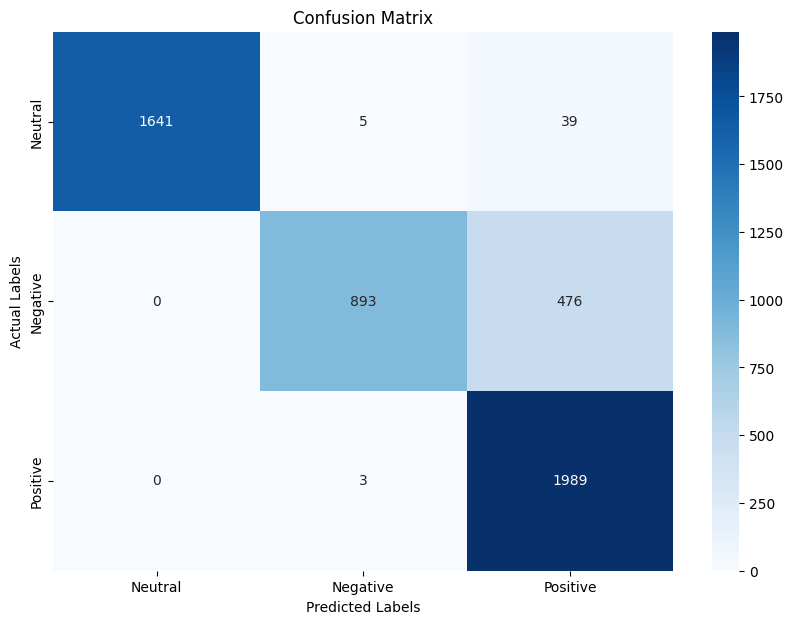

In [ ]:
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral', 'Negative', 'Positive'], yticklabels=['Neutral', 'Negative', 'Positive'])
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculating classification accuracy for a multiclass model
cm = confusion_matrix(y_test, predictions)

In [ ]:
# Calculation of classification error
total_predictions = cm.sum()
total_incorrect_predictions = cm.sum(axis=0) - np.diag(cm)
total_incorrect_predictions = total_incorrect_predictions.sum()

classification_error = total_incorrect_predictions / total_predictions
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1036


In [ ]:
# Initialize arrays to store recall for each class
recalls = np.zeros(cm.shape[0])

# Calculating recall for each class
for i in range(cm.shape[0]):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    recalls[i] = TP / float(TP + FN) if (TP + FN) != 0 else 0

# Average recall across all classes
average_recall = np.mean(recalls)

print('Recall or Sensitivity for each class:', recalls)
print('Average Recall or Sensitivity : {:.4f}'.format(average_recall))

Recall or Sensitivity for each class: [0.97388724 0.65230095 0.99849398]
Average Recall or Sensitivity : 0.8749


In [ ]:
# Initialize arrays to store specificity for each class
specificities = np.zeros(cm.shape[0])

# Calculating specificity for each class
for i in range(cm.shape[0]):
    TN = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    FP = cm[:, i].sum() - cm[i, i]
    specificities[i] = TN / float(TN + FP) if (TN + FP) != 0 else 0

# Average specificity across all classes
average_specificity = np.mean(specificities)

print('Specificity for each class:', specificities)
print('Average Specificity : {:.4f}'.format(average_specificity))

Specificity for each class: [1.         0.99782431 0.8313687 ]
Average Specificity : 0.9431


In [ ]:
# Initialize an array to store precision for each class
precisions = np.zeros(cm.shape[0])

# Calculating precision for each class
for i in range(cm.shape[0]):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    precisions[i] = TP / float(TP + FP) if (TP + FP) != 0 else 0

# Average precision across all classes
average_precision = np.mean(precisions)

print('Precision for each class:', precisions)
print('Average Precision : {:.4f}'.format(average_precision))

Precision for each class: [1.         0.99112098 0.79432907]
Average Precision : 0.9285


In [ ]:
# Assuming y_test and predictions are already defined
print(classification_report(y_test, predictions))

# Calculating classification accuracy for a multiclass model
cm = confusion_matrix(y_test, predictions)

# True Positives (TP) are the diagonal elements
TP = np.diag(cm).sum()

# True Negatives (TN) are not directly used in multiclass classification accuracy

# False Positives (FP) for each class are all the elements in the predicted class column, excluding the TP for that class
FP = cm.sum(axis=0) - np.diag(cm)

# False Negatives (FN) for each class are all the elements in the actual class row, excluding the TP for that class
FN = cm.sum(axis=1) - np.diag(cm)

# Total number of instances
total = cm.sum()

# Classification accuracy calculation
classification_accuracy = TP / total

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1685
           1       0.99      0.65      0.79      1369
           2       0.79      1.00      0.88      1992

    accuracy                           0.90      5046
   macro avg       0.93      0.87      0.89      5046
weighted avg       0.92      0.90      0.89      5046



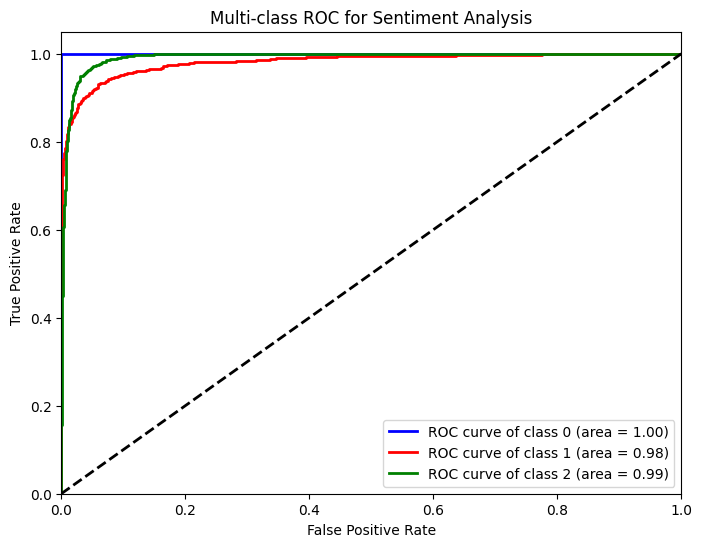

In [ ]:
# Binarize the output labels for each class
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Predict probabilities
y_score = nb_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
  plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Sentiment Analysis')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Binarize the y_test labels for multi-class ROC AUC calculation
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities for each class
y_score = nb_classifier.predict_proba(X_test)

# Compute ROC AUC
# For multi-class, specify 'ovr' for One-vs-Rest or use 'weighted' for weighted averaging
ROC_AUC = roc_auc_score(y_test_binarized, y_score, multi_class='ovr')

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9910
